In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/EDA/구별상권변화지표.xls')

df = df.drop(0, axis=0)

개업: 생존한 사업체의 평균영업기간


폐업: 폐업한 사업체의 평균영업기간

In [ ]:
df.head()

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표
1,2014,1,은평구,11380,88.1,45.3,상권확장
2,2014,1,강서구,11500,83.3,42.8,다이나믹
3,2014,1,구로구,11530,87.4,44.4,다이나믹
4,2014,1,용산구,11170,99.8,48.6,정체
5,2014,1,성동구,11200,93.6,48.4,정체


서울 25개의 자치구에 대해서 분기별 개·폐점률에 따른 상권변화 정도를 예측한다. 상권 변화정도는 다이나믹, 상권확장, 상권축소, 정체 4가지로 나눌 수 있다.
다이나믹: 점포 개·폐점률이 높다. 정체: 점포 개·폐점률이 낮다.

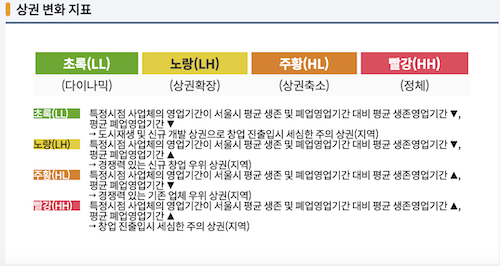

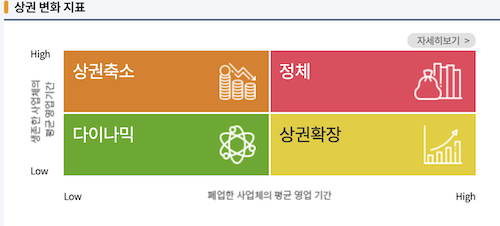

In [ ]:
df1 = df[df['상권변화지표'] == '다이나믹'][['행정구역', '년도' , '분기']]
df1.groupby('행정구역').count().sort_values(ascending=False, by='년도') #총 35(9년*4분기 - 2022 4분기)

,년도,분기
행정구역,,
강남구,35,35
강동구,35,35
강북구,35,35
강서구,35,35
관악구,35,35
광진구,35,35
금천구,35,35
노원구,35,35
도봉구,35,35


In [ ]:
df1 = df[df['상권변화지표'] == '정체'][['행정구역', '년도' , '분기']]
df1.groupby('행정구역').count().sort_values(ascending=False, by='년도') 

,년도,분기
행정구역,,
동대문구,35,35
동작구,35,35
서대문구,35,35
용산구,35,35
종로구,35,35
중구,35,35
성북구,34,34
서초구,16,16
영등포구,15,15


In [ ]:
df1 = df[df['상권변화지표'] == '상권확장'][['행정구역', '년도' , '분기']]
df1.groupby('행정구역').count().sort_values(ascending=False, by='년도') 

,년도,분기
행정구역,,
성동구,24,24
송파구,23,23
은평구,3,3
성북구,1,1


In [ ]:
df1 = df[df['상권변화지표'] == '상권축소'][['행정구역', '년도' , '분기']]
df1.groupby('행정구역').count().sort_values(ascending=False, by='년도') 

,년도,분기
행정구역,,
영등포구,20,20
서초구,19,19
구로구,8,8


상권확장 지역의 특성을 살펴보자!

In [ ]:
df[(df['상권변화지표'] == '상권확장') & (df['행정구역'] == '성동구')]
#라이징지역

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표
280,2016,4,성동구,11200,96.8,54.1,상권확장
305,2017,1,성동구,11200,96.6,54.4,상권확장
330,2017,2,성동구,11200,96.4,54.7,상권확장
355,2017,3,성동구,11200,96.5,54.9,상권확장
380,2017,4,성동구,11200,97.5,55.2,상권확장
405,2018,1,성동구,11200,98.8,55.4,상권확장
430,2018,2,성동구,11200,99.5,55.6,상권확장
455,2018,3,성동구,11200,100.6,55.7,상권확장
480,2018,4,성동구,11200,101.9,56.0,상권확장
505,2019,1,성동구,11200,103.0,56.2,상권확장


In [ ]:
df[(df['상권변화지표'] == '상권확장') & (df['행정구역'] == '송파구')]
#2020년에서 끊김. 

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표
20,2014,1,송파구,11710,91.2,45.4,상권확장
45,2014,2,송파구,11710,92.1,46.0,상권확장
70,2014,3,송파구,11710,93.1,46.5,상권확장
95,2014,4,송파구,11710,93.9,47.2,상권확장
120,2015,1,송파구,11710,94.8,47.6,상권확장
145,2015,2,송파구,11710,95.2,48.2,상권확장
170,2015,3,송파구,11710,95.8,48.5,상권확장
195,2015,4,송파구,11710,96.7,49.0,상권확장
270,2016,3,송파구,11710,96.8,50.2,상권확장
295,2016,4,송파구,11710,96.9,50.7,상권확장


상권축소지역의 특징을 살펴보자!

In [ ]:
df[(df['상권변화지표'] == '상권축소') & (df['행정구역'] == '영등포구')]
df[df['행정구역'] == '영등포구']
#새로운 산업이 자리잡기 어려운 지역

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표
13,2014,1,영등포구,11560,95.0,44.9,상권축소
38,2014,2,영등포구,11560,96.0,45.5,상권축소
63,2014,3,영등포구,11560,97.0,45.9,상권축소
88,2014,4,영등포구,11560,98.0,46.5,상권축소
113,2015,1,영등포구,11560,98.9,47.0,상권축소
138,2015,2,영등포구,11560,99.2,47.5,상권축소
163,2015,3,영등포구,11560,99.6,47.9,상권축소
188,2015,4,영등포구,11560,100.4,48.5,상권축소
213,2016,1,영등포구,11560,100.5,48.9,상권축소
238,2016,2,영등포구,11560,100.3,49.4,상권축소


In [ ]:
df[(df['상권변화지표'] == '상권축소') & (df['행정구역'] == '서초구')]
df[df['행정구역'] == '서초구']
#새로운 산업이 자리잡기 어려운 지역

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표
12,2014,1,서초구,11650,95.7,44.6,상권축소
37,2014,2,서초구,11650,96.5,45.2,상권축소
62,2014,3,서초구,11650,97.4,45.7,상권축소
87,2014,4,서초구,11650,98.3,46.4,상권축소
112,2015,1,서초구,11650,99.3,46.8,상권축소
137,2015,2,서초구,11650,99.7,47.3,상권축소
162,2015,3,서초구,11650,100.2,47.8,상권축소
187,2015,4,서초구,11650,101.1,48.4,상권축소
212,2016,1,서초구,11650,101.3,48.7,상권축소
237,2016,2,서초구,11650,101.5,49.1,상권축소


In [ ]:
df[(df['상권변화지표'] == '상권축소') & (df['행정구역'] == '구로구')]
df[df['행정구역'] == '구로구']
#다이나믹 -> 정체 : 개폐점 많다가 2020 기준으로 정체. (=2020년 이후로 자리잡은 지역, 왜 일까?)

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표
3,2014,1,구로구,11530,87.4,44.4,다이나믹
28,2014,2,구로구,11530,88.4,44.9,다이나믹
53,2014,3,구로구,11530,89.3,45.4,다이나믹
78,2014,4,구로구,11530,90.2,46.0,다이나믹
103,2015,1,구로구,11530,90.8,46.5,다이나믹
128,2015,2,구로구,11530,91.2,46.9,다이나믹
153,2015,3,구로구,11530,91.6,47.2,다이나믹
178,2015,4,구로구,11530,92.1,47.8,다이나믹
203,2016,1,구로구,11530,92.5,48.0,다이나믹
228,2016,2,구로구,11530,92.3,48.4,다이나믹


**추세선을 그려보자.**

전체

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api

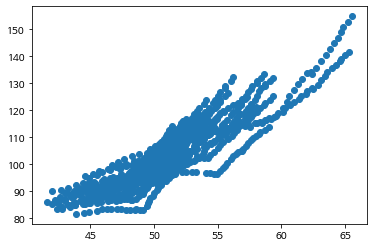

In [ ]:
#전체
plt.plot(df['폐업'], df['개업'], 'o')
plt.show()

In [ ]:
line_fitter = LinearRegression()
line_fitter.fit(df["폐업"].values.reshape(-1,1), df["개업"])

LinearRegression()

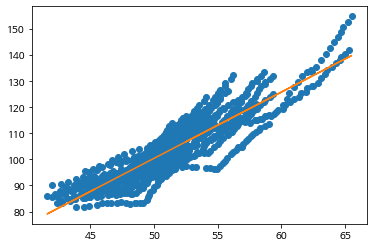

In [ ]:
plt.plot(df['폐업'], df['개업'], 'o')
plt.plot(df["폐업"],line_fitter.predict(df["폐업"].values.reshape(-1,1)))
plt.show()

In [ ]:
print(line_fitter.intercept_, line_fitter.coef_)

-26.590181374390014 [2.54057488]


구로구(상권축소) vs 성동구(상권확장) 


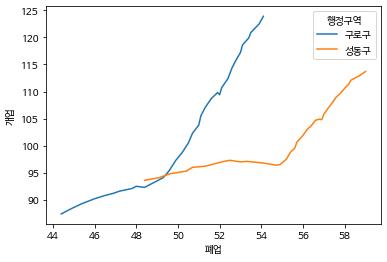

In [ ]:
df_g = df[df['행정구역']=='구로구']
df_s = df[df['행정구역']=='성동구']

df_merged = pd.concat([df_g, df_s])

sns.lineplot(x='폐업', y='개업', hue='행정구역', data = df_merged)